In [1]:
from pmdarima import auto_arima
import arch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [2]:
df = pd.read_csv("../Data/American Companies/AAPL 1980 2022.csv").dropna()
prices = np.array(df.Open)

prices_not_returns = True
test_size = 300
start_h = len(prices) - test_size
end_h = len(prices)

In [3]:
# подбираем ARIMA
arima_model = auto_arima(
    prices[:start_h],
    start_p= 0,
    start_q= 0,
    d= 1 if prices_not_returns else 0,
    max_p= 10,
    max_d= 2,
    max_q= 10,
    max_order= 7,
    seasonal= False,
    information_criterion= "bic",
    alpha= 0.01,
    test= "kpss",
    stepwise= True,
    n_fits= 72,
    trace= True)
arima_model.summary()

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=17639.447, Time=0.92 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=17629.550, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=17625.653, Time=0.68 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=17636.023, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=17600.688, Time=2.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : BIC=17571.259, Time=2.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : BIC=17564.403, Time=0.62 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : BIC=17570.247, Time=0.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : BIC=17576.189, Time=4.94 sec
 ARIMA(2,1,0)(0,0,0)[0]             : BIC=17562.699, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : BIC=17626.654, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0]             : BIC=17568.825, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0]             : BIC=17569.782, Time=1.22 sec
 ARIMA(1,1,1)(0,0,0)[0]             : BIC=17599.061, Time=0.48 sec
 ARIMA(3,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10291
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -8767.491
Date:                Mon, 13 Mar 2023   AIC                          17540.983
Time:                        19:37:59   BIC                          17562.699
Sample:                             0   HQIC                         17548.323
                              - 10291                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0461      0.002    -25.088      0.000      -0.050      -0.043
ar.L2         -0.0843      0.002    -44.010      0.000      -0.088      -0.081
sigma2         0.3218      0.001    423.211      0.000       0.320       0.323
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):           2034732.11
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):           12578.52   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        71.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [4]:
residuals = arima_model.resid()

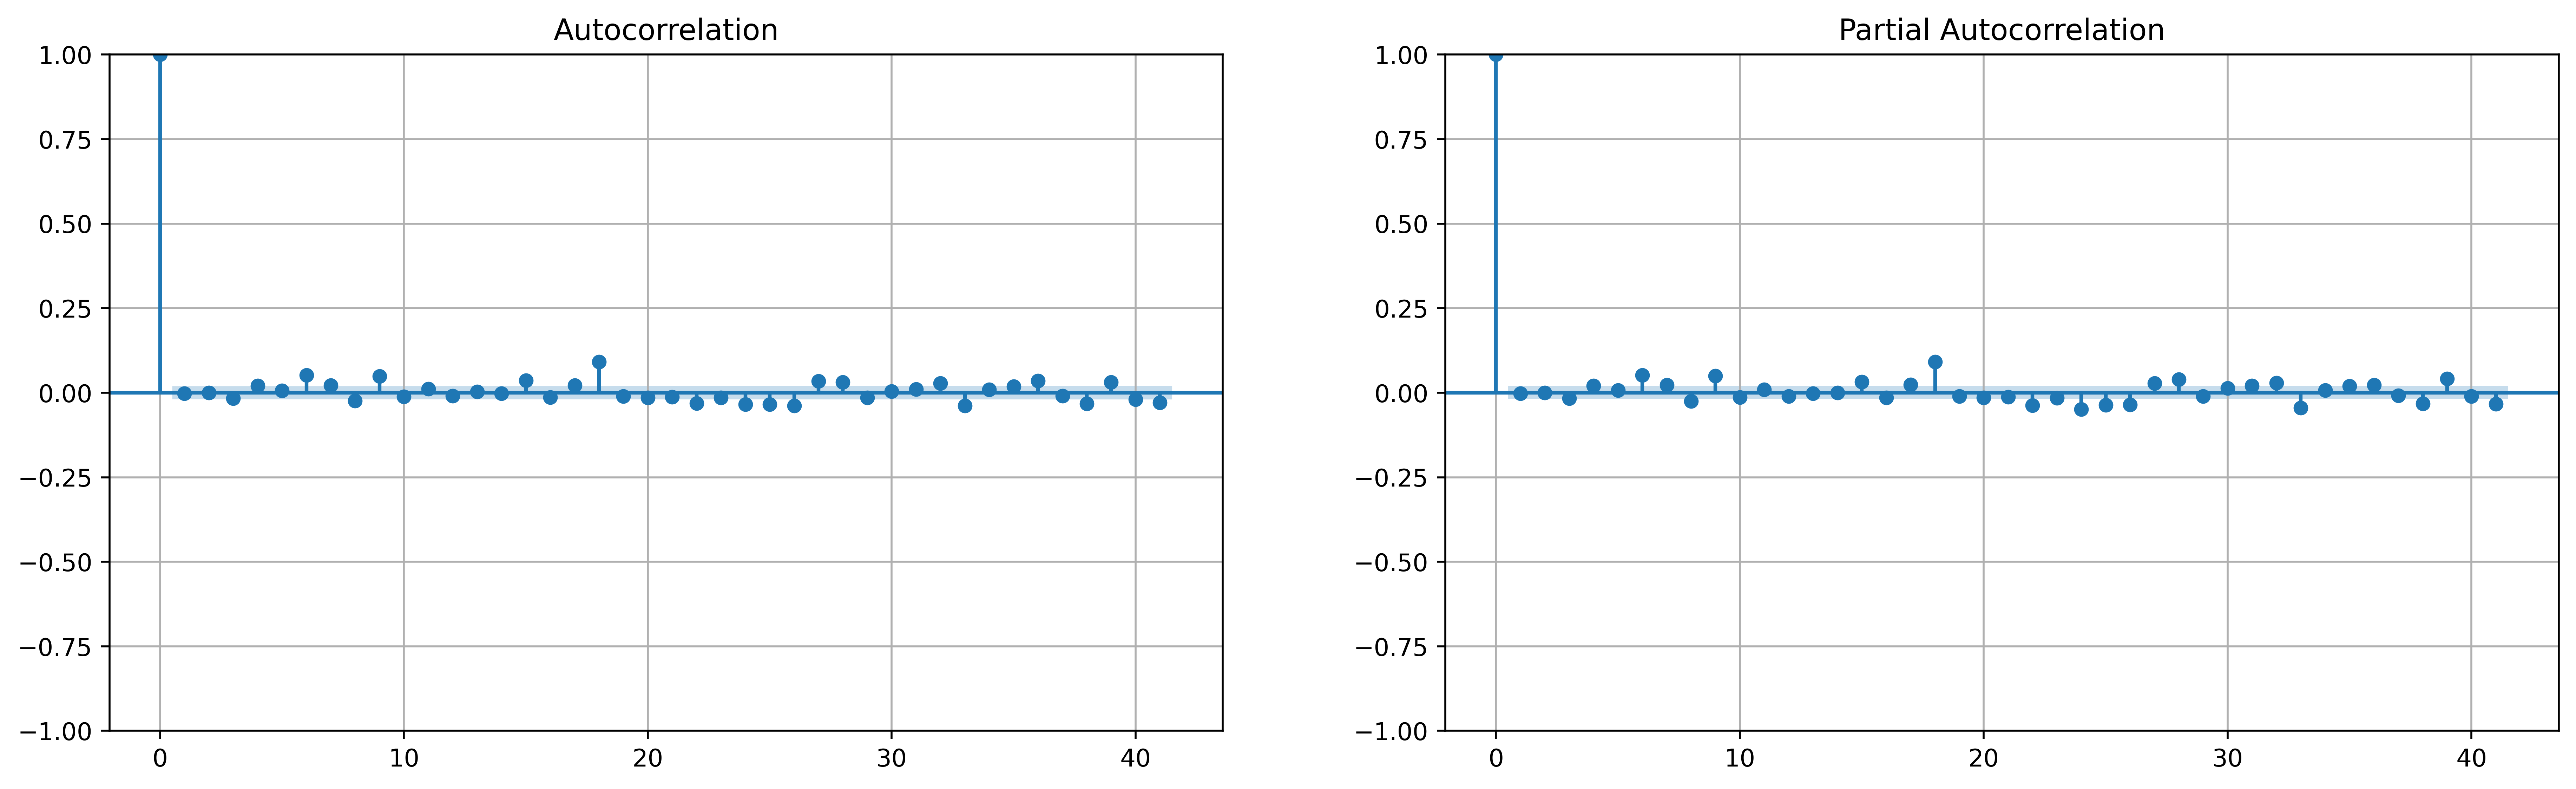

In [5]:
plt.rcParams.update({'figure.dpi' : 500})
f = plt.figure(figsize= (18, 5))

ax1 = f.add_subplot(121)
plot_acf(residuals, ax= ax1);
plt.grid(True)

ax2 = f.add_subplot(122)
plot_pacf(residuals, ax= ax2, method= "ywm");
plt.grid(True)

plt.show()

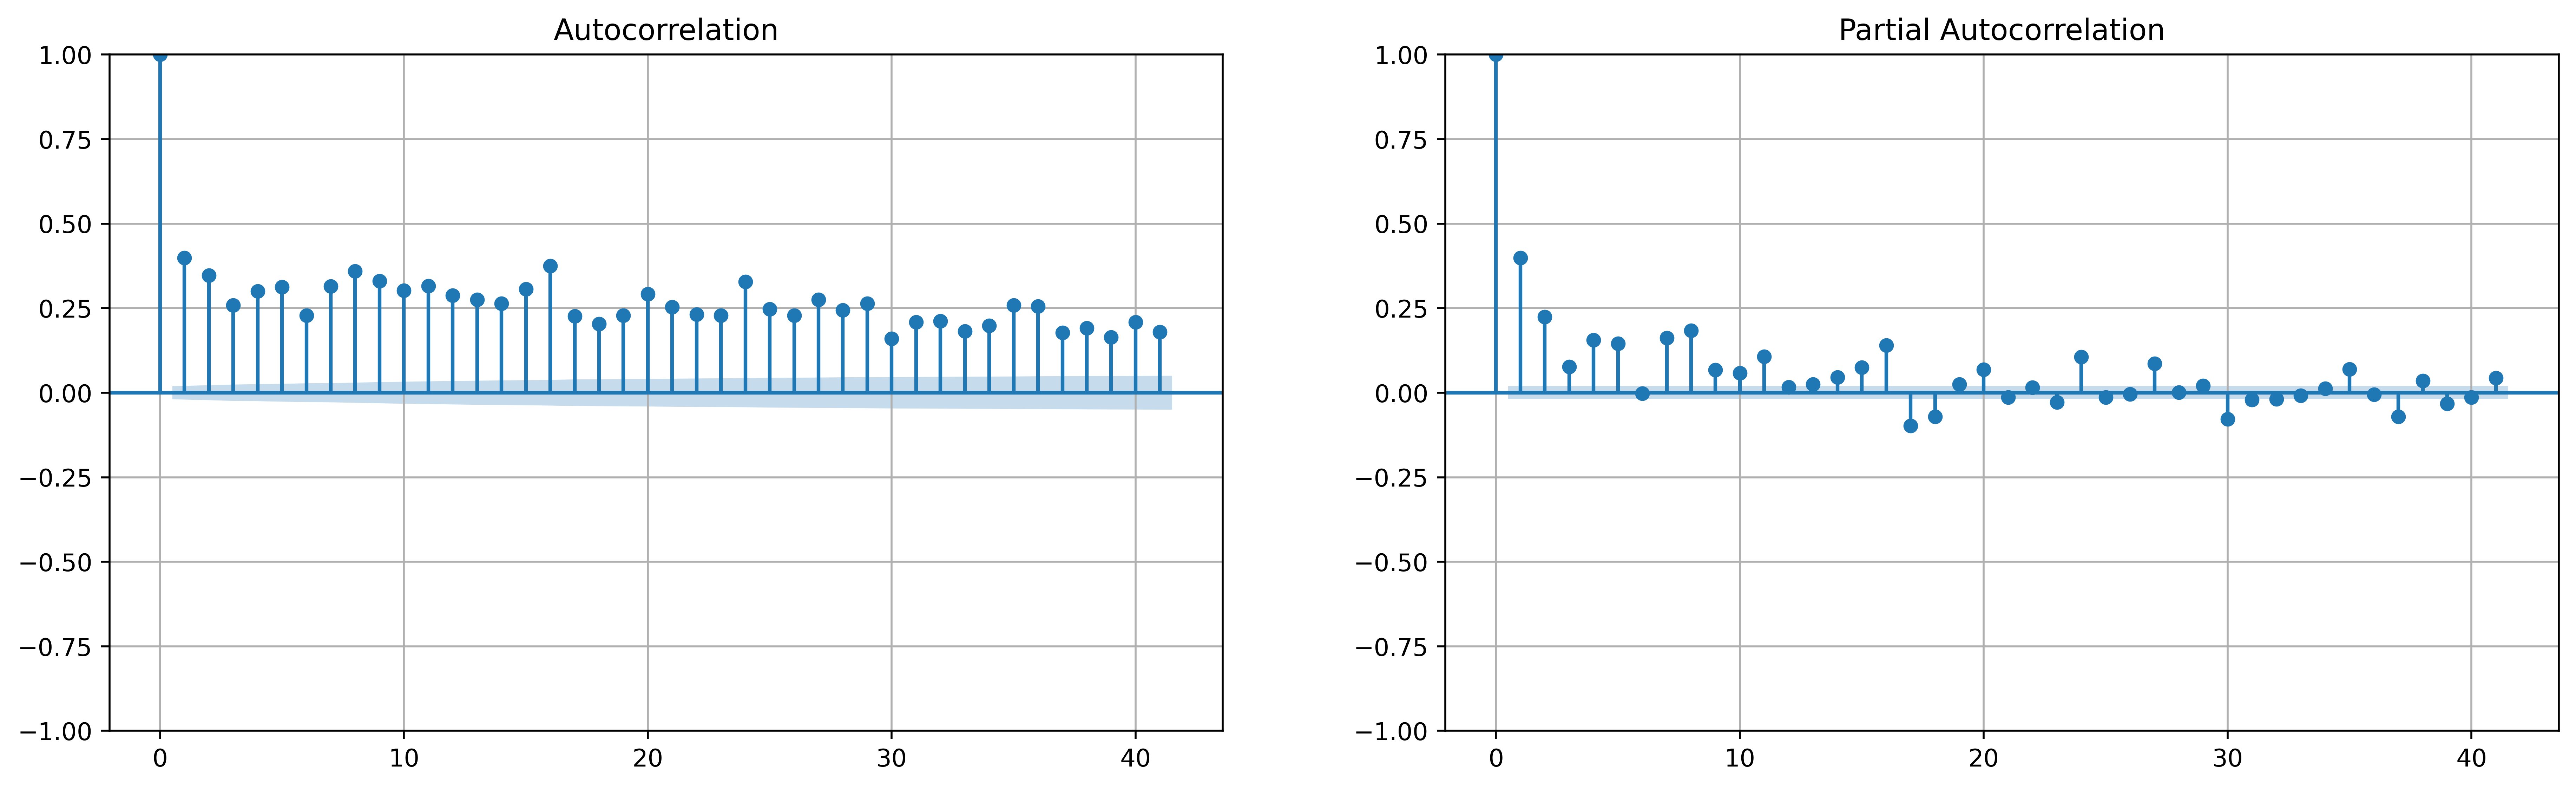

In [6]:
# Переход к квадратам
residuals_sqr = residuals ** 2

plt.rcParams.update({'figure.dpi' : 500})
f = plt.figure(figsize= (18, 5))

ax1 = f.add_subplot(121)
plot_acf(residuals_sqr, ax= ax1);
plt.grid(True)

ax2 = f.add_subplot(122)
plot_pacf(residuals_sqr, ax= ax2, method= "ywm");
plt.grid(True)

plt.show()

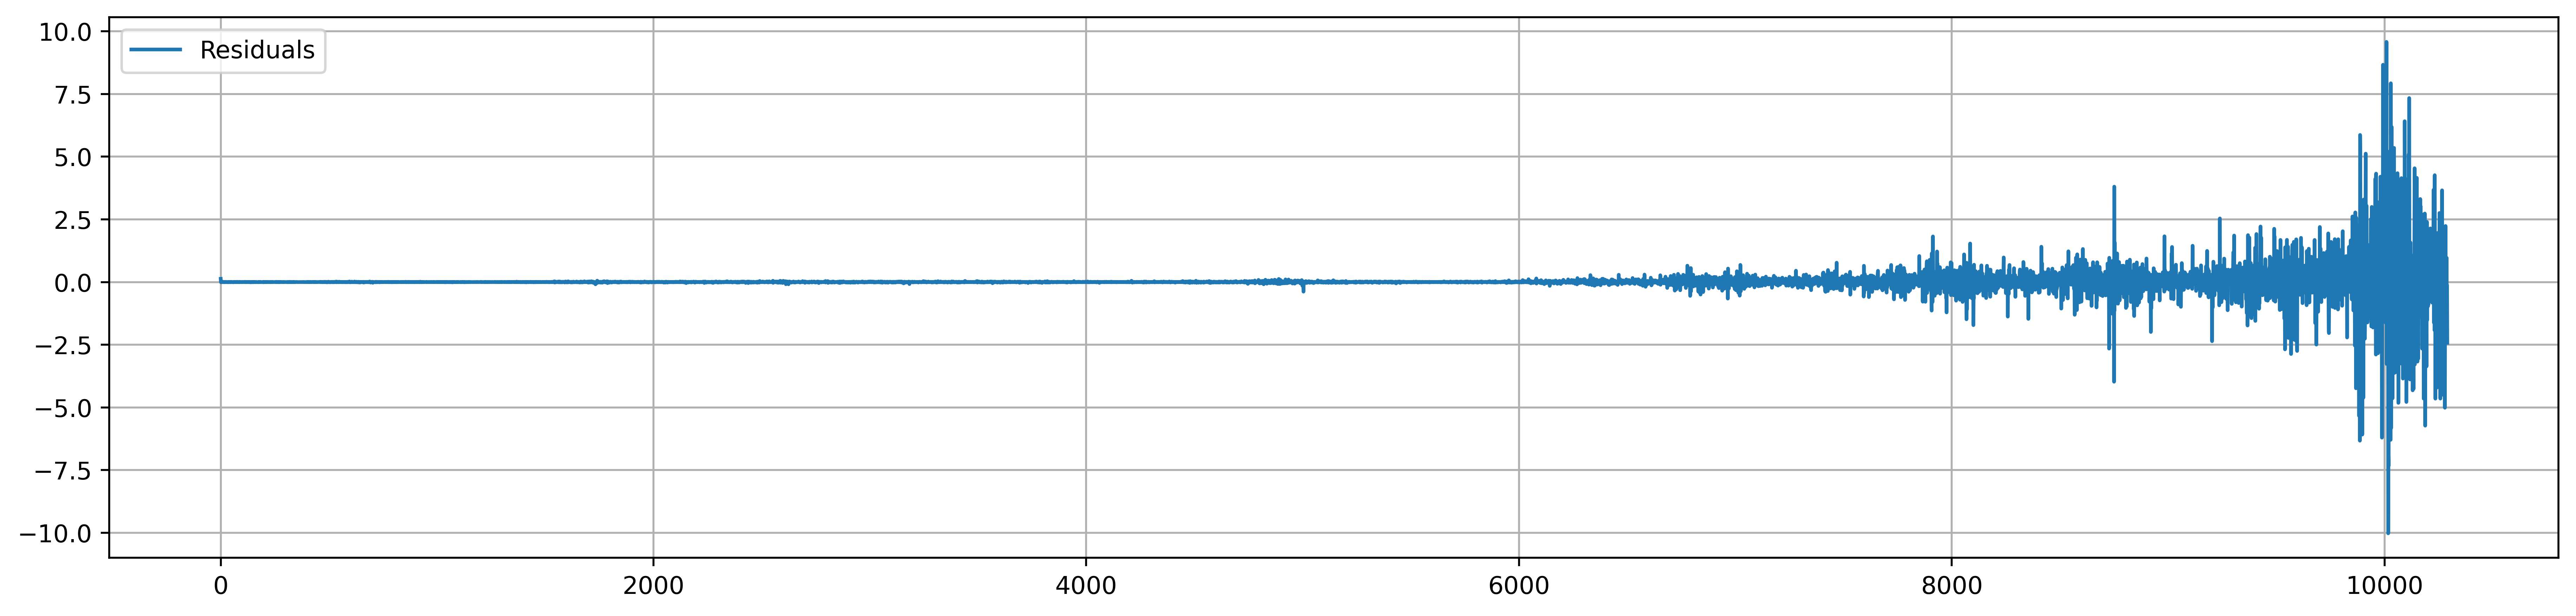

In [7]:
plt.figure(figsize= (18, 4))
plt.grid(True)
plt.plot(residuals, label= "Residuals")
plt.legend(loc= "best")
plt.show()

In [15]:
model = arch.arch_model(residuals, mean= "zero",  vol= "GARCH", p= 1, q= 1, dist= "normal")
garch_model = model.fit(disp= "off")
garch_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3420.06
Distribution:                  Normal   AIC:                          -6834.12
Method:            Maximum Likelihood   BIC:                          -6812.40
                                        No. Observations:                10291
Date:                Mon, Mar 13 2023   Df Residuals:                    10291
Time:                        19:48:35   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      6.4356e-03  6.915e-05     93.072      0.000 [6.300e-03,6.571e-03]
alpha[1]       0.2000  8.741e-03     22.881 7.213e-116     [  0.183,  0.217]
beta[1]        0.7800  3.919e-03    199.008      0.000     [  0.772,  0.788]
============================================================================

Covariance estimator: robust
"""

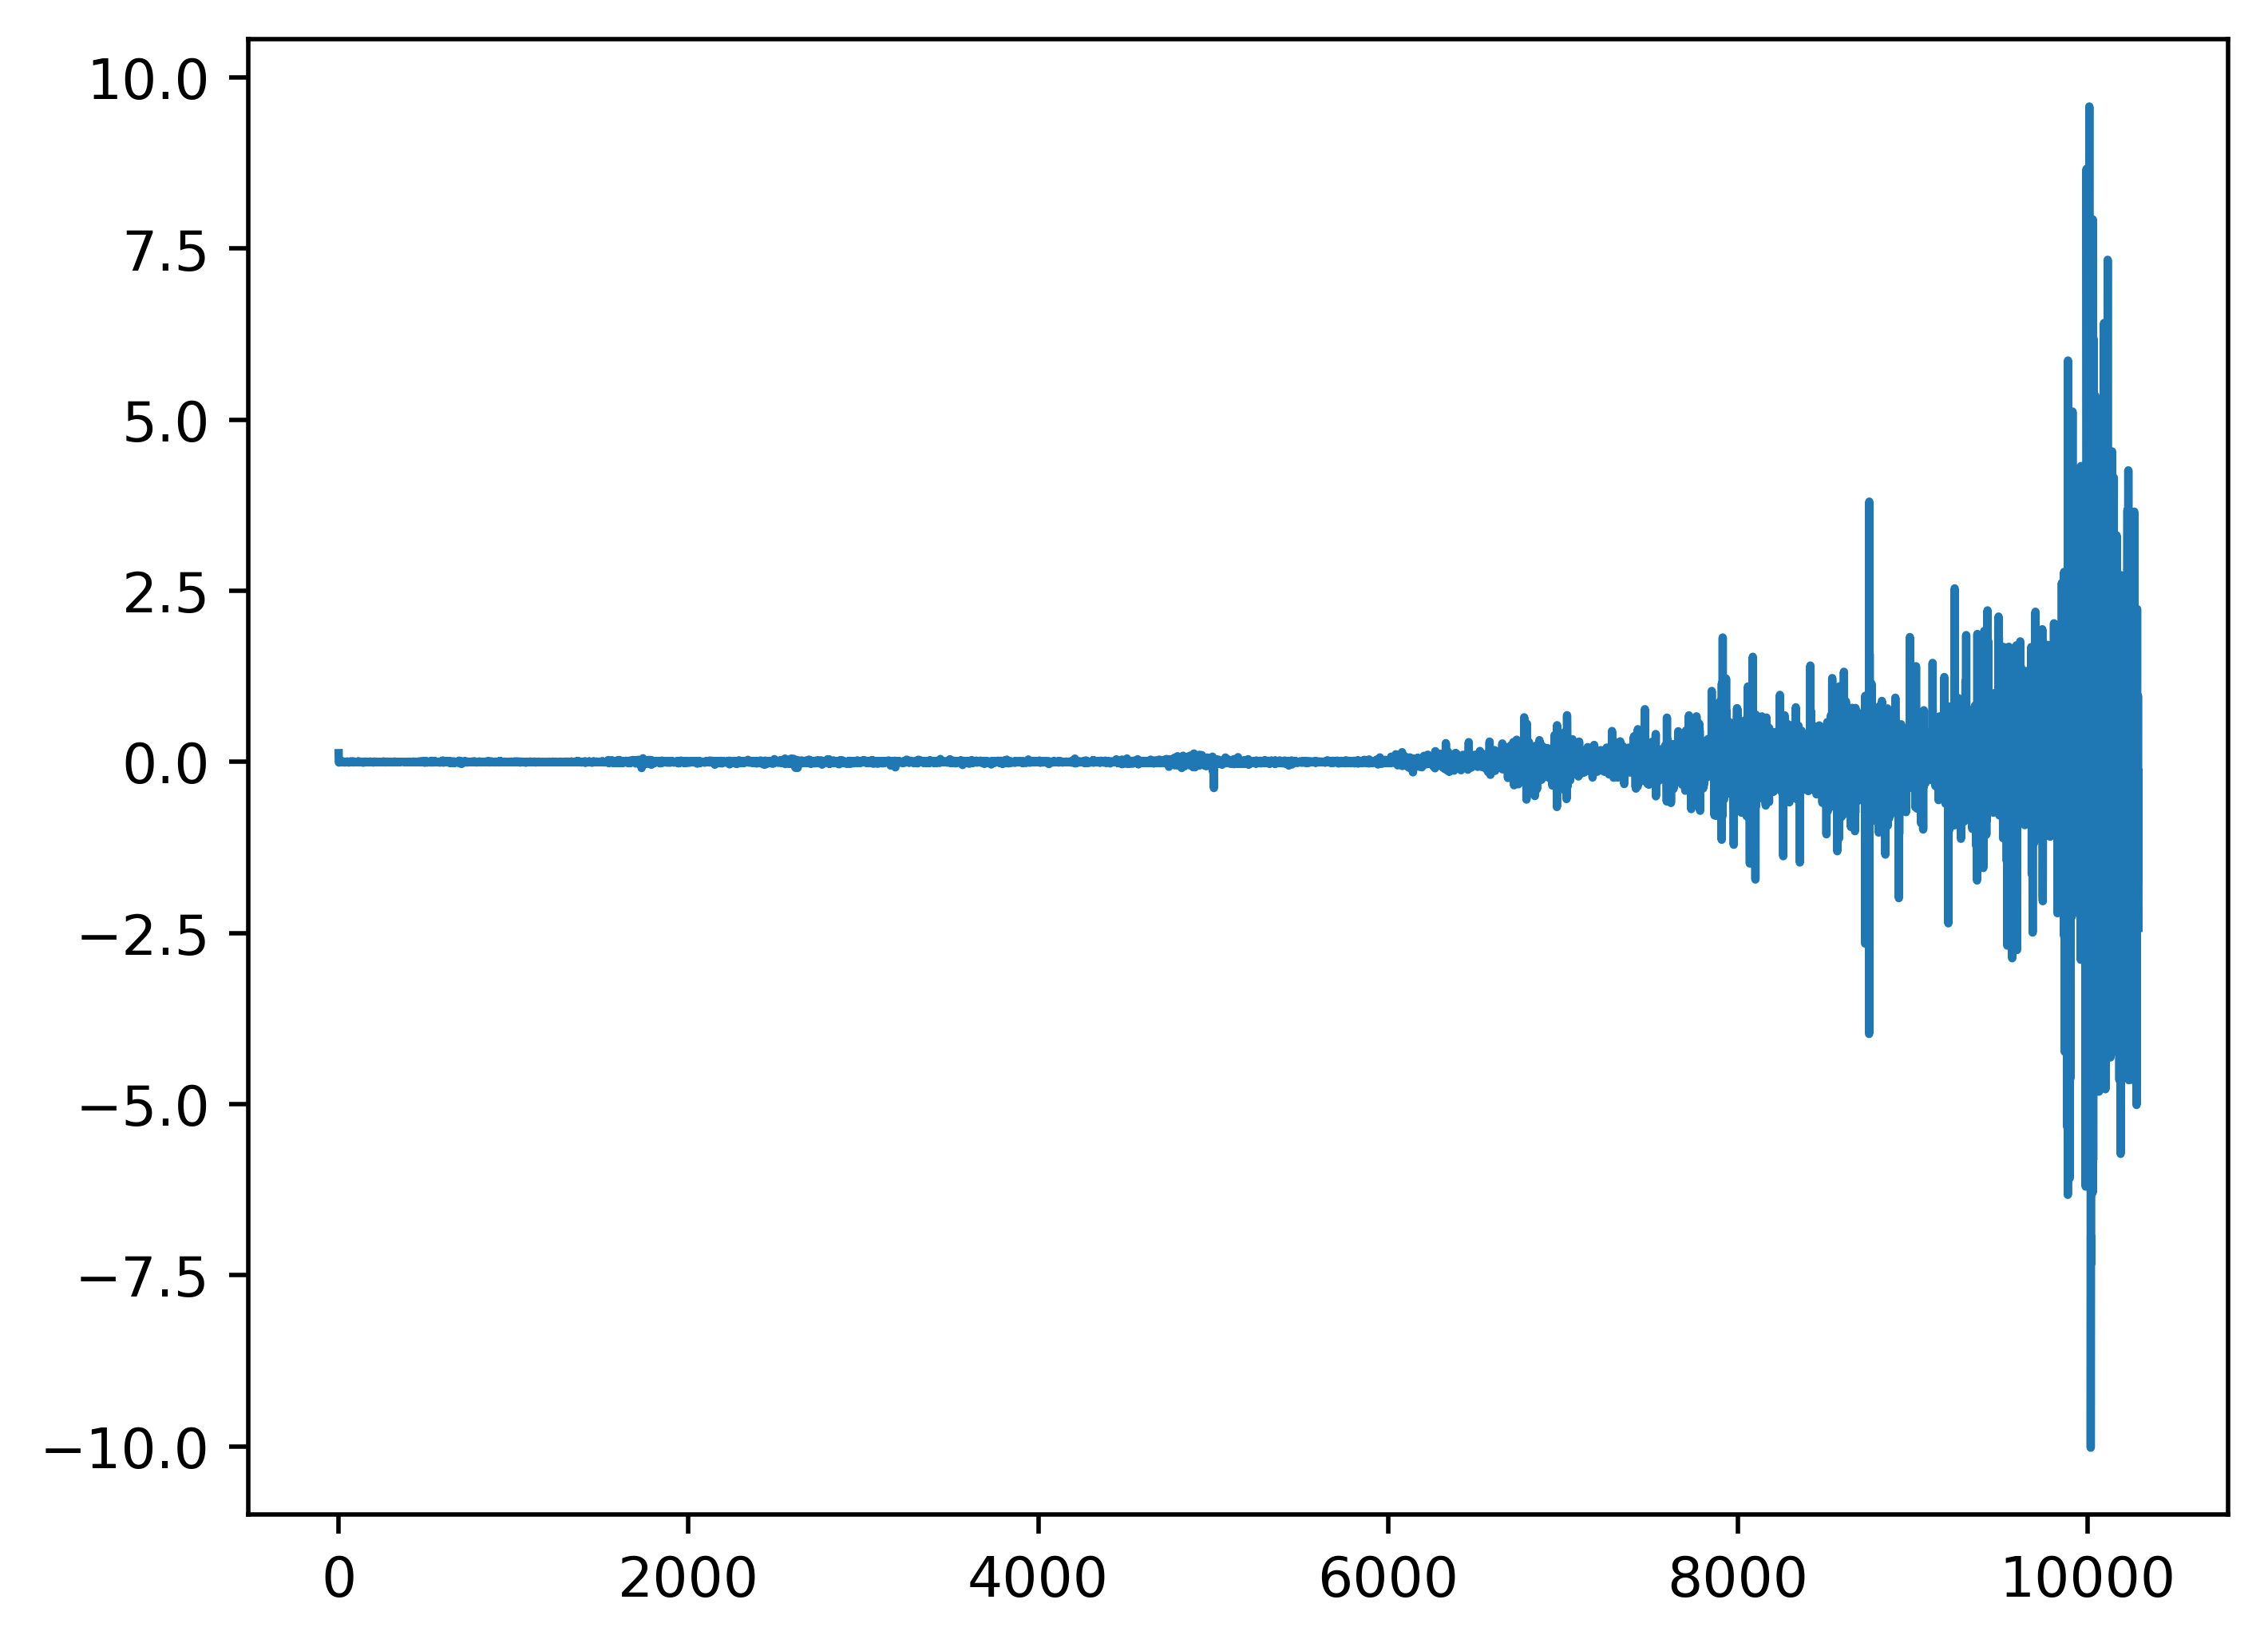

In [18]:
plt.plot(garch_model.resid)